### 
# Assignment 0: Blood Glucose 

Company A developed a product to help patients control blood glucose. They recorded the blood glucose of their patients across a year. The data is stored in the file ‘a.csv’.  The headers of this file are:
- data_utc: data in universal time coordinated
- bg_checks: the times that the patient checks blood glucose
- avg_bg_value: average blood glucose
- count_hyper_reading: not important in this assignment
- count_hypo_reading: not important in this assignment


## Setup

In [1]:
#Import sys library
import sys

In [2]:
#Import numpy library
import numpy as np

In [3]:
#Import pandas library
import pandas

In [4]:
#Import matplotlib
import matplotlib.pyplot as plt

## Step 1: Read Data
Your task is to load the average blood glucose for each member in each day into the matrix 'BG'.
1. Find all the unique member id
2. Store average blood glucose in 'BG'
    - The average blood glucose value on some dates is missing. They will show as 'nan' in 'data'. You need to replace the missing bg value as the average of the previous day and the next day.
    - 'BG' is a matrix that has the size NUMBER_OF_MEMBERS X 365_DAYS. Store the blood glucose value in the matching date.

In [5]:
# Read data from the csv file
data = pandas.read_csv('a.csv')
data

,member_id,diabetes_type,gender,date_utc,bg_checks,avg_bg_value,count_hyper_reading,count_hypo_reading
0,10213339002895,Type 2,Female,8/1/2017,4,157.00000,2,1
1,10213339002895,Type 2,Female,8/2/2017,4,152.61111,1,1
2,10213339002895,Type 2,Female,8/3/2017,1,157.88235,1,0
3,10213339002895,Type 2,Female,8/4/2017,2,162.47058,2,0
4,10213339002895,Type 2,Female,8/5/2017,4,166.22223,2,1
...,...,...,...,...,...,...,...,...
72972,1029648302090,Type 1,Male,7/27/2018,5,139.81250,0,2
72973,1029648302090,Type 1,Male,7/28/2018,4,115.70000,1,2
72974,1029648302090,Type 1,Male,7/29/2018,6,128.48387,2,0
72975,1029648302090,Type 1,Male,7/30/2018,5,147.18750,5,0


### Store all the unique member id in 'member'

In [6]:
"""
See https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/
See https://pandas.pydata.org/docs/user_guide/indexing.html#indexing
See https://data36.com/pandas-tutorial-2-aggregation-and-grouping/

You can pass a list of columns to [] to select columns in that order. If a column is not
contained in the DataFrame, an exception will be raised """

hello = data.count()
hello

member_id              72977
diabetes_type          72977
gender                 72977
date_utc               72977
bg_checks              72977
avg_bg_value           71799
count_hyper_reading    72977
count_hypo_reading     72977
dtype: int64

In [7]:
data[['member_id']]

,member_id
0,10213339002895
1,10213339002895
2,10213339002895
3,10213339002895
4,10213339002895
...,...
72972,1029648302090
72973,1029648302090
72974,1029648302090
72975,1029648302090


In [8]:
members = data[['member_id']].groupby('member_id').count()
members

""
member_id
1022970537115
1023580908884
1023757968164
1023785155422
1023790793933
...
10217799862216
10217808077477
10217870037076


In [9]:
NUMBER_OF_MEMBERS = len(members)
NUMBER_OF_MEMBERS

200

### Initialize BG

In [10]:
"""
See https://numpy.org/doc/stable/reference/generated/numpy.zeros.html

np.zeros((number of rows, number of columns)) fills new matrix with zeroes
"""
BG = np.zeros((NUMBER_OF_MEMBERS,365))
BG

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Store bg values in BG
Each row refers to a unique member and each column refers to a bg recording from a particular day.

The average blood glucose value on some dates is missing. They will show as 'nan' in 'data'.
You need to replace the missing bg value as the average of the previous day and the next day.

In [11]:
#One row of BG has 365 days
BG[[0]]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [12]:
len(BG[[0]])

1

In [13]:
BG.shape

(200, 365)

In [14]:
BG.ndim

2

In [15]:
BG[1,0]

0.0

In [16]:
members

""
member_id
1022970537115
1023580908884
1023757968164
1023785155422
1023790793933
...
10217799862216
10217808077477
10217870037076


In [17]:
members = members.reset_index()
members

,member_id
0,1022970537115
1,1023580908884
2,1023757968164
3,1023785155422
4,1023790793933
...,...
195,10217799862216
196,10217808077477
197,10217870037076
198,10217927464151


In [18]:
members['member_id'].loc[1]

1023580908884

### ANSWER

In [19]:
i = 0
k = 0

while i < 200:
    #Grab ID number of the member
    s = members['member_id'].loc[i]
    #print('Loop ID: ' + str(s))
    #print('\n')
    
    #Create dataframe for that member's bg values
    df = data[data.member_id == s][['avg_bg_value']]
    df = df.reset_index(drop = True)
    #print(df)
    #print('\n')
    
    #Return number of bg vals for the ID
    rows = df.shape[0]
    #print('Num rows bg val for ID: ' + str(rows))
    
    
    #Start variable add
    add = 365 - rows
    
    #Initialize column array
    col = []
    
    #Initialize counter for the ID's bg
    j = int(0)
    #print('j: ' + str(j))
    #print('\n')
    
    while j < rows:        
        
        #Store that bg measurement
        bg = df['avg_bg_value'].loc[j]
        #print('Measurement: ' + str(bg))
        #print('\n')
        
        #Append bg measurement to col array
        col.append(bg)

        #Handle exceptions at the end of bg dataframe
        if add != 0 and j == (rows-1):
            #HANDLE THE EXCEPTIONS
            #print("NOPE!")
            x = 0
            while x < add:
                col.append(bg)
                x += 1
            j += 1
        else:  
            #Increment to next blood glucose value  
            j += 1
        
    #Convert array col into a one-dimensional matrix with numpy      
    A = np.array(col)
    #print(A)
    
    #Set the k-th matrix row equal to the ID's one-dimensional matrix of avg bg values       
    BG[[k]] = A
    
    #Increment to the next ID and the next BG matrix row
    i += 1
    k += 1

print(BG)

[[173.69565 167.69565 164.65218 ... 158.40909 147.63637 147.42857]
 [124.      125.76923 122.92308 ... 128.3158  123.64706 127.22222]
 [157.61539 189.77777       nan ... 148.05882 147.88235 146.8125 ]
 ...
 [134.125   119.63636 118.14286 ... 171.71428 166.78261 166.5    ]
 [      nan       nan       nan ... 169.83333 169.83333 169.83333]
 [      nan       nan 122.2     ... 135.91837 135.91837 135.91837]]


### Replace the NaN in the filled BG matrix
Handle the 'nan's in the data. Replace the nan with the previous non-nan value or the next non-nan value.

In [20]:
np.isnan(BG[0,0]) == 0

True

In [21]:
BG[0,-1]

147.42857

In [22]:
BG.shape

(200, 365)

In [23]:
BG.ndim

2

### ANSWER

In [24]:
#Row index number
l = 0

#Column index number
m = 0

while l < 200:
    #print('This is the row were on: ' + str(l))
    while m < 365:
        #print('This is the column were on: ' + str(m))
        #Handle the NaN by either finding the last/next bg val that is NOT NaN
       
        if np.isnan(BG[l,m]) == 1:
            #print('\n')
            #print('This is NaN: ' + str(BG[l,m]))
            #print(str(members['member_id'].loc[l]))
            #print('\n')
            
            #If the previous value is a number and within first column, store
            #Set t to 1
            t = 1
            while np.isnan(BG[l,m]) == 1:
                if np.isnan(BG[l,(m-t)]) == 0 and (m-t) >= 0:
                    new = BG[l,(m-t)]
                    BG[l,m] = new
                    #print('Last is good: ' + str(BG[l,m]))
                    #print('\n')

                #If the next value is a number and within last column, store    
                elif np.isnan(BG[l,(m+t)]) == 0 and (m+t) < 365:
                    new = BG[l,(m+t)]
                    BG[l,m] = new
                    #print('Next is good: ' + str(BG[l,m]))
                    #print('\n')

                #Else increment t up 1 and try again 
                else:
                    t += 1
        
        else:        
            #Go to the next column item
            #print(str(BG[l,m]))
            m += 1
        
    #Reset your column to 0 again
    m = 0
    #Go to the next row
    l += 1

print(BG)

#numpy.sum(BG) will only be NaN iff there is at least one NaN, so this should return True
np.isnan(np.sum(BG)) == 0

[[173.69565 167.69565 164.65218 ... 158.40909 147.63637 147.42857]
 [124.      125.76923 122.92308 ... 128.3158  123.64706 127.22222]
 [157.61539 189.77777 189.77777 ... 148.05882 147.88235 146.8125 ]
 ...
 [134.125   119.63636 118.14286 ... 171.71428 166.78261 166.5    ]
 [207.      207.      207.      ... 169.83333 169.83333 169.83333]
 [122.2     122.2     122.2     ... 135.91837 135.91837 135.91837]]


True

### Plot the averaged bg across all members

Use the matplotlib to plot the averaged bg across all members ('avg_all'). The x-axis should be the 'date from first day ('day') and the y-axis should be ('bg'). Add title as 'All member avg bg'.

(365,)
[155.71324885 156.2734912  155.949726  ]
[0 1 2 3 4]


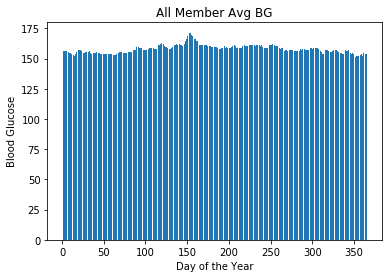

In [25]:
avg_all = np.average(BG, axis=0)
print(avg_all.shape)
print(avg_all[0:3])
print(np.arange(0,5))

#How to plot a bar graph from a table: https://365datascience.com/bar-chart-python-matplotlib/
plt.bar(x = np.arange(1,366), height = avg_all[0:365])
plt.ylabel('Blood Glucose')
plt.xlabel('Day of the Year')
plt.title('All Member Avg BG')
plt.show()
